<a href="https://colab.research.google.com/github/naenumtou/learnTensorFlow/blob/main/LeicaModel/LeicaPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Install libraries
!pip install imageai --upgrade #Image AI

In [ ]:
# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/LeicaDetection

/content/drive/My Drive/Colab Notebooks/LeicaDetection


In [ ]:
# Import libraries
import os
import matplotlib.pyplot as plt
import cv2

from imageai.Detection.Custom import CustomObjectDetection

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

In [ ]:
# Load detector
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# Load custom trained model
modelPath = os.path.join(os.getcwd(), 'model')
detector.setModelPath(os.path.join(modelPath , 'detection_model-ex-017--loss-0004.640.h5'))
detector.setJsonPath(os.path.join(modelPath , 'detection_config.json'))
detector.loadModel()

In [ ]:
# Prediction and write output
testPath = os.path.join(os.getcwd(), 'Test')
outPath = os.path.join(os.getcwd(), 'Output')

for imageFile in os.listdir(testPath):
  testFile = os.path.join(testPath, imageFile)
  outFile = os.path.join(outPath, imageFile)
  detections = detector.detectObjectsFromImage(
    input_image = testFile,
    output_image_path = outFile
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


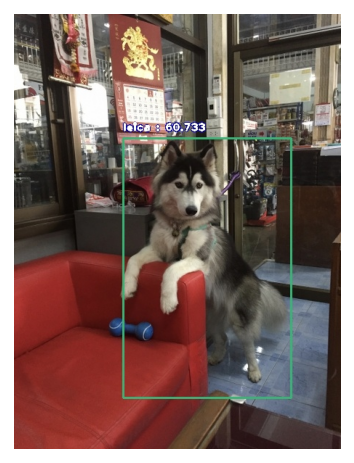

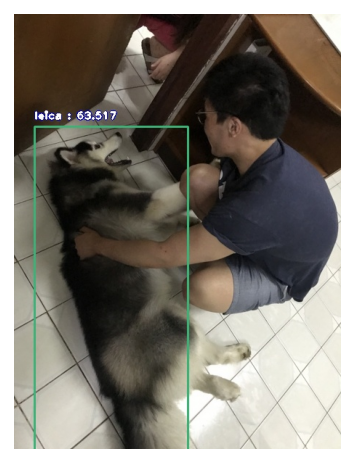

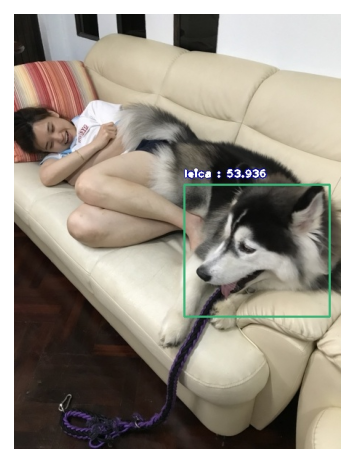

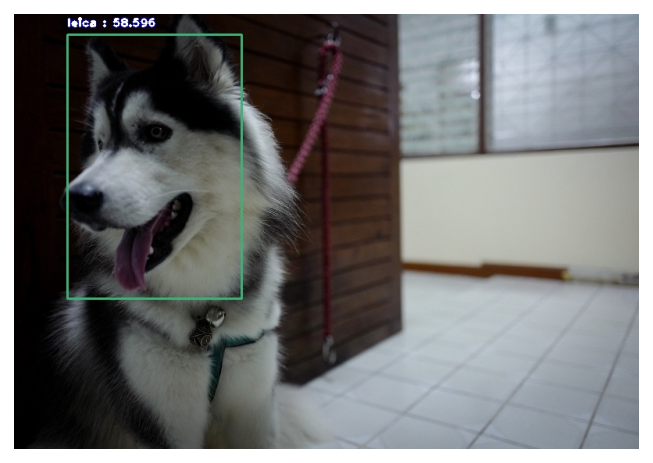

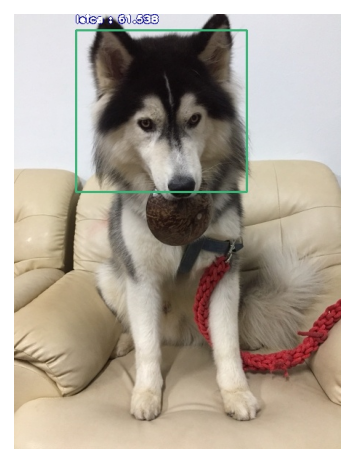

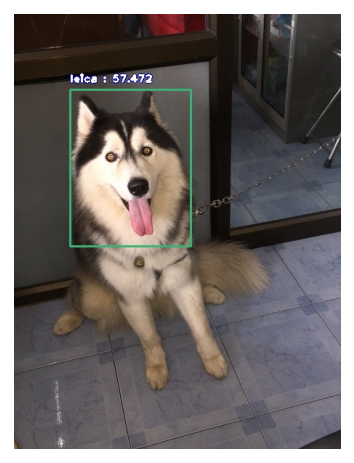

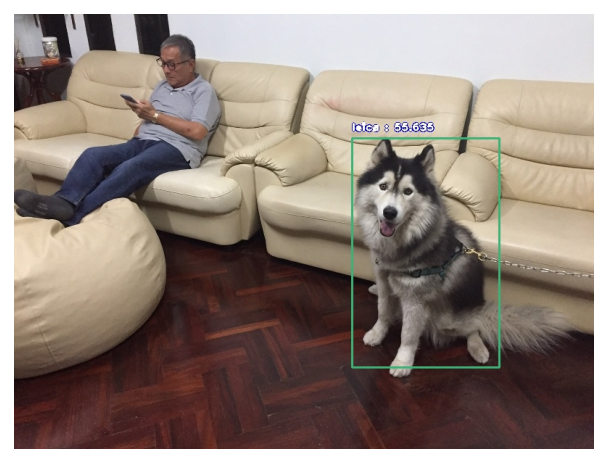

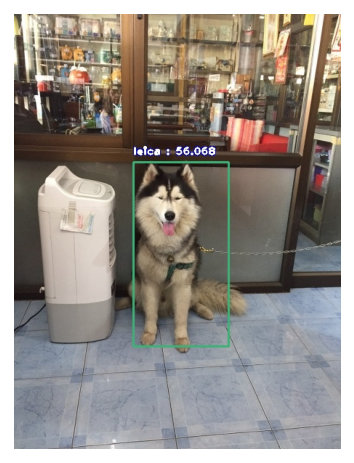

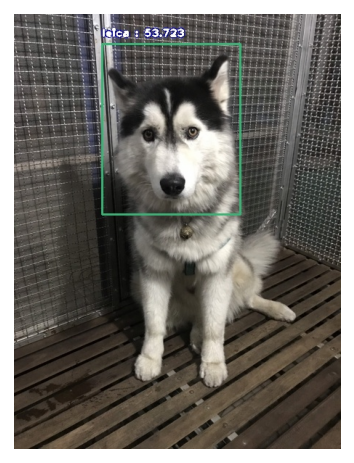

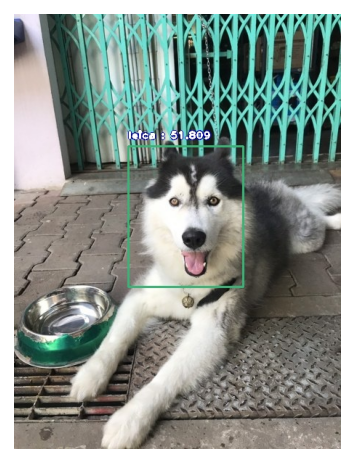

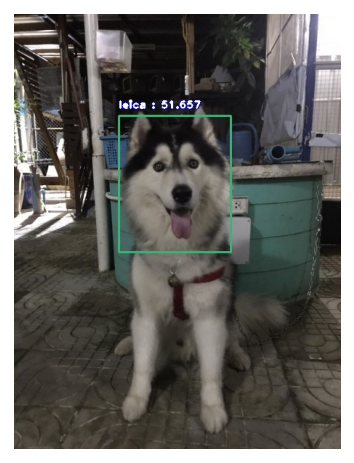

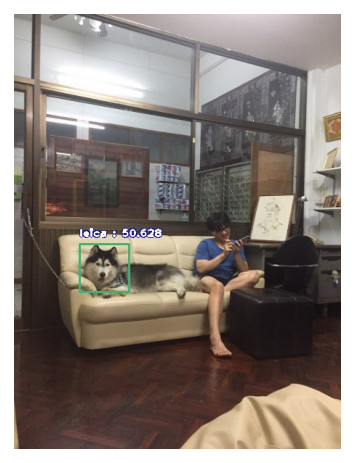

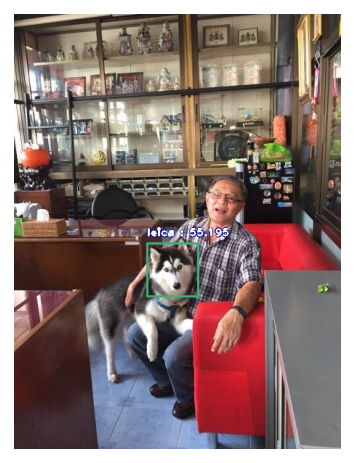

In [ ]:
# Show result
for imageFile in os.listdir(outPath):
  image = os.path.join(outPath, imageFile)
  image = cv2.imread(image)
  plt.imshow(image[:, :, ::-1])
  plt.axis('off')
  plt.show()